In [260]:
import pandas as pd
import numpy as np
np.random.seed(42)

df = pd.read_csv('hsbc_twitter_DATA_not GENERAL.csv')
df.rename(columns={"NEW HUMAN CATEGORY\n 0-1000 /4000-4468 Michael\n 1000-2500 Mehmet \n 2500-4000 Aryamaan":"labels"}, inplace = True)
df.head()

,,tweet,"HUMAN CATEGORY\n ARYAMAAN:1-1000,4000-4468\n Michael-Mehmet:1000-4000",SUB CATEGORY,COMMENTS,labels,SUB CATEGORY.1,COMMENTS.1,human category (Tarun),SUB CATEGORY.2,COMMENTS.2,NEW CATEGORY,keyword,human - category,human - Sub category,Comment,HUMAN CATGEORY_NEW(ARYA),location,COMMENTS (FROM PARIJAAT),Category,Sub-category
0,2,"@LondOgrad Hello Eugene, we do apologise for t...",CUSTOMER_SERVICE_ISSUES,NaN,bad customer service,Customer Service Response,NaN,customer service reply,NaN,NaN,NaN,customer_service issues,delay,Delay,delay in calls,Huge Queues,customer_service_issues,"London, UK",NaN,{'category': 'Delay',subcategory': 'Delay in bounce back loan'
1,8,@ncohen4 @CooperativeBank @HSBC @HSBCUKBusines...,BAD REPUTATION,NaN,NaN,General,NaN,NaN,NaN,NaN,NaN,Bad_reputation,unhappy,{'category': 'Reputation',subcategory': 'Bad reputation',worst experience from customer – mess,BAD_REPUTATION,"Plymouth, England",NaN,{'category': 'Reputation',subcategory': 'Good reputation'
2,9,"@sharaola Good morning, sorry for your experie...",CUSTOMER_SERVICE_ISSUES,NaN,bad customer service,Customer Service Response,NaN,customer service reply,NaN,NaN,NaN,customer_service issues,customerservice,{'category': 'customer_service issues',subcategory': 'customerservice',General response from bank,General,"Cairo, Egypt",General message from hsbc,{'category': 'Reputation',subcategory': 'Good reputation'
3,11,@Bounce_BackLoan Still not a peep from HSBC,DELAY,Delay_in_bounce_back_loan,delay in bounce back loan,DELAY,Delay_in_bounce_back_loan,delay in bounce back loan,NaN,NaN,NaN,Delay_Bounceback_Loan,"delay , no response",{'category': 'Bounce back loan',subcategory': 'Bounce back loan delays',No reply,DELAY_BOUNCEBACK_LOAN,"Enschede, Nederland",DELAY,{'category': 'Bounce back loan',subcategory': 'Bounce back loan delays'
4,15,@djm2481 @mgcmitchell @HSBC_UK Thanks for the ...,Customer Service Response,NaN,customer service reply,Customer Service Response,NaN,customer service reply,NaN,NaN,NaN,General,any queries,{'category': 'Reputation',subcategory': 'General Response from Bank (tha...,General response from bank,NaN,United Kingdom,NaN,{'category': 'Reputation',subcategory': 'Good reputation'


In [261]:
# reducing General Data 1500
drop_indices = np.random.choice(df.loc[df["labels"]=="General"].index, 1500, replace=False)
df = df.drop(drop_indices)

In [262]:
df.labels.value_counts()

General                      769
DELAY                        716
Customer Service Response    653
BAD REPUTATION               229
CUSTOMER_SERVICE_ISSUES      227
Customer Query               168
GOOD REPUTATION              101
COVID19                       50
CHURN                         37
ESG                            6
Junk                           4
Language                       2
Name: labels, dtype: int64

In [263]:
df_clean = df.tweet
df_clean.shape

(2967,)

In [264]:
df_clean = df_clean.dropna()
df_clean.shape

(2967,)

In [265]:
df_clean

0       @LondOgrad Hello Eugene, we do apologise for t...
2       @sharaola Good morning, sorry for your experie...
3             @Bounce_BackLoan Still not a peep from HSBC
4       @djm2481 @mgcmitchell @HSBC_UK Thanks for the ...
5       @Bounce_BackLoan any evidence of anyone gettin...
                              ...                        
4462    @demosisto why should HSBC show their support?...
4463    @BritishBBank @Bounce_BackLoan @Metro_Bank I w...
4464    @WWIIadvertising Hi David. Sorry somethings up...
4465    @HSBC thank you I just called in on the phone ...
4466    @shezRommy @Bounce_BackLoan Probably be quicke...
Name: tweet, Length: 2967, dtype: object

In [266]:
list_data = df_clean.to_list()
list_data = [str(sent) for sent in list_data]

In [97]:
from sentence_transformers import SentenceTransformer

In [98]:
# distilbert-base-nli-mean-tokens
# paraphrase-distilroberta-base-v1

In [99]:
model=SentenceTransformer('paraphrase-distilroberta-base-v1')
embeddings = model.encode(list_data, show_progress_bar=True)

Batches:   0%|          | 0/93 [00:00<?, ?it/s]

In [267]:
embeddings.shape

(2967, 768)

In [101]:
import umap

In [212]:
three_dim_embedding = umap.UMAP(n_components=3).fit_transform(embeddings)
#n_neighbors=10, min_dist=0.0, 

In [213]:
three_dim_embedding

array([[-0.21750711,  5.1691723 ,  1.8341097 ],
       [ 0.85636634,  5.263206  ,  2.3382912 ],
       [-0.97281075,  0.04238867, -0.7292106 ],
       ...,
       [ 0.37677526,  4.714656  ,  2.492212  ],
       [-0.8124863 ,  2.9303033 ,  1.8894824 ],
       [-2.4499943 ,  1.1132046 , -0.01254607]], dtype=float32)

In [268]:
import hdbscan

In [283]:
def cluster_results(min_samples1=10,min_samples2=10,min_samples3=10):
    global cluster1,cluster2,cluster3
    cluster1 = hdbscan.HDBSCAN(min_samples = min_samples1,).fit_predict(three_dim_embedding)

    cluster2 = hdbscan.HDBSCAN(min_samples = min_samples2,
                               cluster_selection_epsilon = 0.5).fit_predict(three_dim_embedding)

    cluster3 = hdbscan.HDBSCAN(min_samples = min_samples3,
                               min_cluster_size=10,
                               cluster_selection_epsilon = 0.5,
                               metric = 'euclidean',
                               cluster_selection_method = "eom").fit_predict(three_dim_embedding)

    clusters = cluster1,cluster2,cluster3

    for cluster in clusters:
        unique, counts = np.unique(cluster, return_counts=True)
        print(dict(zip(unique, counts)))

In [284]:
cluster_results(min_samples1=15,min_samples2=15,min_samples3=15)


{-1: 304, 0: 23, 1: 19, 2: 16, 3: 27, 4: 62, 5: 2253, 6: 38, 7: 71, 8: 115, 9: 29, 10: 10}
{-1: 82, 0: 23, 1: 547, 2: 62, 3: 2253}
{-1: 82, 0: 23, 1: 547, 2: 62, 3: 2253}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


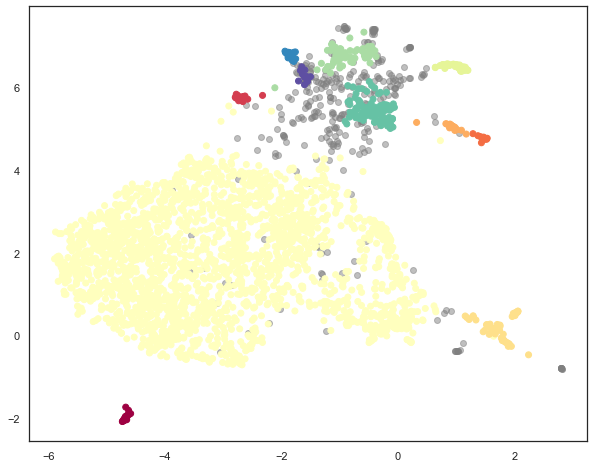

In [285]:
cluster = cluster1

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(10,8)})

two_dim_embedding = umap.UMAP(n_components=2).fit_transform(embeddings)


clustered = (cluster >= 0)
plt.scatter(two_dim_embedding[~clustered, 0],
            two_dim_embedding[~clustered, 1],
            c=(0.5,0.5,0.5),
            # s=1,
            alpha=0.5
            )
plt.scatter(two_dim_embedding[clustered, 0],
            two_dim_embedding[clustered, 1],
            c=cluster[clustered],
            # s=1,
            cmap='Spectral');

In [286]:
docs = pd.DataFrame(df_clean)
docs["cluster"] = cluster
docs

,tweet,cluster
0,"@LondOgrad Hello Eugene, we do apologise for t...",-1
2,"@sharaola Good morning, sorry for your experie...",8
3,@Bounce_BackLoan Still not a peep from HSBC,5
4,@djm2481 @mgcmitchell @HSBC_UK Thanks for the ...,-1
5,@Bounce_BackLoan any evidence of anyone gettin...,5
...,...,...
4462,@demosisto why should HSBC show their support?...,5
4463,@BritishBBank @Bounce_BackLoan @Metro_Bank I w...,5
4464,@WWIIadvertising Hi David. Sorry somethings up...,8
4465,@HSBC thank you I just called in on the phone ...,5


In [287]:
labeled_docs_all = docs.groupby(["cluster"], as_index=False).agg({"tweet": " ".join})

In [288]:
labeled_docs_all

,cluster,tweet
0,-1,"@LondOgrad Hello Eugene, we do apologise for t..."
1,0,@craig_removals @Bounce_BackLoan @ting_tong22 ...
2,1,"@TroullosAndrew Hi Andrew, we are receiving ex..."
3,2,@harshildave87 Thanks for sharing! This is not...
4,3,@ptaylo Hi Phil. This isn't a genuine text fro...
5,4,You can hear from some of the hottest brands a...
6,5,@Bounce_BackLoan Still not a peep from HSBC @B...
7,6,"Good morning, I am Nanis and I'll be happy to ..."
8,7,"@harshcasm Hello Harish, thank you for writing..."
9,8,"@sharaola Good morning, sorry for your experie..."


In [289]:
import re

def remove_unicode(text):

    try:
        text = text.encode("latin_1").decode("raw_unicode_escape").encode('utf-16', 'surrogatepass').decode('utf-16')
    except:
        text = text
        
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)
    
    text = re.sub(emoji_pattern, '', text)
    text = ''.join(text.split('\\n')) # to remove uncompiled \n
    text = re.sub('\n', '', text)     # to remove compiled \n

    return text

In [290]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
# tokens_without_sw=[t for t in list_data2 if t not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [291]:
def clean_data(text, small_word_lmt=3, extra_words=["hsbc","ðÿœˆ","bank"], stop_words = stop_words):
    
    text = remove_unicode(text)
    list_data2=[]
    sentence=text.lower().split(' ')
    for word in sentence:
        if not (word.startswith('@') | word.startswith('#') | word.startswith('http')) \
           and len(word) > small_word_lmt \
           and not word.isnumeric() \
           and word not in extra_words \
           and word not in stop_words \
           and word.isalpha() :
            list_data2.append(word)

    return " ".join(list_data2)

In [292]:
labeled_docs = labeled_docs_all
labeled_docs.tweet = labeled_docs_all.tweet.apply(clean_data)

In [293]:
labeled_docs

,cluster,tweet
0,-1,hello apologise delay current lines huge check...
1,0,personal barclays want account face next barcl...
2,1,receiving extremely high volumes requests busi...
3,2,thanks please click link report phishing sharo...
4,3,genuine text thank report sending hello thanks...
5,4,hear hottest brands dial speakers coca mark cu...
6,5,still peep evidence anyone getting think paid ...
7,6,good nanis happy answer banking questions quer...
8,7,hello thank writing back online transactions c...
9,8,good sorry please send contact details along n...


In [294]:
del labeled_docs_try

In [295]:
 pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', None)

In [296]:
labeled_docs_try =pd.DataFrame(df_clean)
labeled_docs_try["labels"] = df.labels
labeled_docs_try["cluster"] = docs.cluster
labeled_docs_try.head(50)
pd.crosstab(labeled_docs_try.labels, labeled_docs_try.cluster)

cluster,-1,0,1,2,3,4,5,6,7,8,9,10
labels,,,,,,,,,,,,
BAD REPUTATION,1,3,0,0,0,1,224,0,0,0,0,0
CHURN,0,0,0,0,0,0,37,0,0,0,0,0
COVID19,8,0,0,0,0,0,42,0,0,0,0,0
CUSTOMER_SERVICE_ISSUES,1,0,0,0,0,0,225,0,1,0,0,0
Customer Query,3,0,0,0,0,0,165,0,0,0,0,0
Customer Service Response,252,0,18,15,27,0,82,38,69,113,29,10
DELAY,5,0,0,0,0,0,711,0,0,0,0,0
ESG,0,0,0,0,0,0,6,0,0,0,0,0
GOOD REPUTATION,3,18,0,0,0,0,80,0,0,0,0,0


In [297]:
labeled_docs_try["labels"].value_counts()

General                      769
DELAY                        716
Customer Service Response    653
BAD REPUTATION               229
CUSTOMER_SERVICE_ISSUES      227
Customer Query               168
GOOD REPUTATION              101
COVID19                       50
CHURN                         37
ESG                            6
Junk                           4
Language                       2
Name: labels, dtype: int64

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [306]:
def tfidfmatrix(data, vectorizer):
    terms = vectorizer.fit_transform(data)
    return pd.DataFrame(terms.toarray(), columns = vectorizer.get_feature_names())

tfidf_vec = TfidfVectorizer()

In [307]:
tfidf_mat = tfidfmatrix(labeled_docs.tweet, tfidf_vec)

In [308]:
tfidf_mat

,abandoned,abigail,ability,able,aboard,abrindo,abroad,abse,absolute,absolutely,abtak,abuse,academic,accelerate,accelerating,accept,acceptable,acceptance,accepted,accepting,acces,accesible,access,accessible,accident,...,wrong,wrote,xancelled,xxxxxxxxxxx,yahoo,yday,yeah,year,yearly,years,yelling,yesterday,yield,yippee,york,yorkshire,young,youre,youtube,youve,yung,zejtun,zero,zeroed,ziad
0,0.000000,0.008407,0.000000,0.129778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031891,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007220,0.000000,0.012756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.294747,0.016375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.245902,0.000000,0.016375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175060,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.050322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.001329,0.000000,0.003988,0.040224,0.001329,0.000000,0.001329,0.001329,0.013701,0.027403,0.001329,0.002659,0.001329,0.005318,0.001329,0.006052,0.001329,0.003988,0.015954,0.006647,0.001329,0.001329,0.034293,0.002659,0.001329,...,0.025119,0.003988,0.001329,0.001329,0.001329,0.001329,0.006647,0.013701,0.001329,0.034293,0.001329,0.037679,0.001329,0.001329,0.005318,0.003988,0.001329,0.001329,0.001142,0.001329,0.001329,0.001329,0.009306,0.001329,0.000000
7,0.000000,0.000000,0.000000,0.044728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [309]:
top_n = 15
most_common = pd.DataFrame({n: tfidf_mat.T[col].nlargest(top_n).index.tolist() 
                        for n, col in enumerate(tfidf_mat.T)}).T

In [310]:
most_common.index = np.unique(cluster)
most_common

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
-1,thank,hello,sorry,thanks,writing,team,please,call,number,able,happy,details,link,back,kindly
0,worst,absolute,feeder,minute,business,connected,within,every,years,bounce,regret,customer,account,experience,call
1,applications,quickly,thousands,bounce,possible,working,business,received,customers,back,funds,coming,applied,make,loans
2,screenshot,thanks,send,click,link,please,report,hello,right,phishing,wish,crock,sharon,immediately,knew
3,text,scam,forward,send,attached,messages,links,letting,thank,phishing,delete,screenshot,access,email,stay
4,join,coca,content,cuban,hottest,institute,lined,mark,shanghai,speaker,speakers,brands,dial,marketing,line
5,applied,still,account,feeder,waiting,back,business,bounce,loan,weeks,money,application,since,people,told
6,morning,happy,queries,good,assist,banking,tomorrow,great,tweet,thursday,hope,help,back,weekend,ayat
7,team,kindly,hello,concerned,send,hsbcsm,fetch,registered,thank,checked,details,mobile,number,request,writing
8,full,name,please,sorry,post,link,look,code,send,postcode,help,thank,check,using,thanks
